In [ ]:
!conda --version


/bin/bash: line 1: conda: command not found


In [16]:
!conda create -n pymol_env python=3.7
#!conda activate pymol_env
#!conda install -c schrodinger pymol

/bin/bash: line 1: conda: command not found


In [17]:
!source activate pymol_env

/bin/bash: line 1: activate: No such file or directory


In [18]:
import os
import pathlib
from pathlib import Path
import glob
from google.colab import drive
drive.mount('/content/drive')
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
first_pdb = Path('/content/drive/MyDrive/ConfDiff_Test/1AX3_A/1AX3-1-A.pdb')
second_pdb = Path('/content/drive/MyDrive/ConfDiff_Test/1AX3_A/1AX3-2-A.pdb')


In [20]:
!pip install biopython
from Bio.PDB import PDBParser
p = PDBParser()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.0 MB/s eta 0:00:00


In [ ]:
first_structure = p.get_structure('structure1', str(first_pdb))
second_structure = p.get_structure('structure2', str(second_pdb))

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

%shell mamba install -c schrodinger pymol-bundle --yes

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pymol-bundle']

warning  libmamba Could not parse mod/etag header
warning

In [ ]:
from pymol import cmd


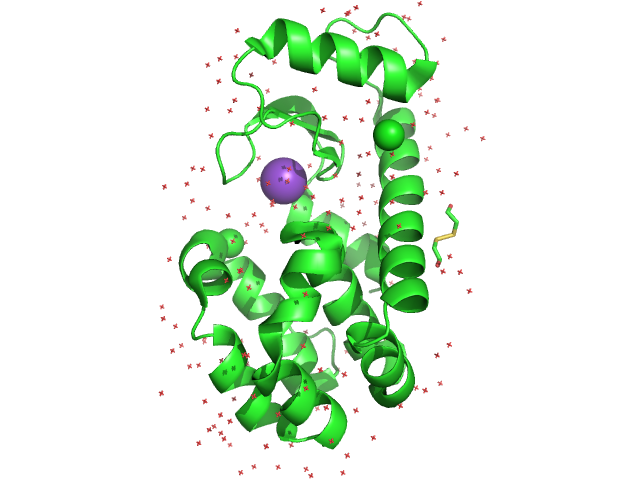

In [ ]:
from IPython.display import Image
cmd.do("fetch 1lw9")
cmd.do("orient 1lw9")
cmd.do("rotate z, 80")
cmd.do("rotate y, 30")
cmd.do("png test.png")
Image(filename = "test.png", unconfined=True)

In [ ]:
%shell cp ./drive/MyDrive/ConfDiff_Test/pymol-edu-license.lic .

In [ ]:
cmd.do("fetch 1hbb")
cmd.do("create conf1, chain B")
cmd.do("create conf2, chain D")
cmd.do("delete 1hbb")

cmd.do("alter conf2, chain='B'")
cmd.do("alter all, segi=''")

print(cmd.do("align conf1, conf2"))





None


In [ ]:
import __main__
__main__.pymol_argv = [ 'pymol', '-qc'] # Quiet and no GUI

import sys, time, os
import pymol

pymol.finish_launching()

cmd.do("set fetch_path, /content/drive/MyDrive/ConfDiff_Test/1AX3_A")
cmd.do("load /content/drive/MyDrive/ConfDiff_Test/1AX3_A/1AX3-14-A.pdb", "1AX3-14-A")
cmd.do("load /content/drive/MyDrive/ConfDiff_Test/1AX3_A/1AX3-16-A.pdb", "1AX3-16-A")

ModuleNotFoundError: ignored

<ipython-input-21-7dc01e02fd62>:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(rmsd, method='single')


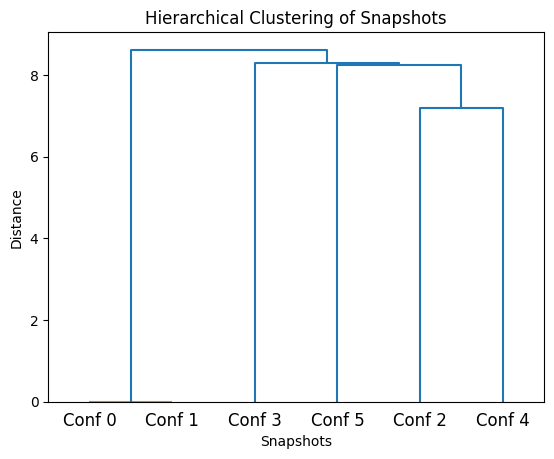

In [21]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Replace this with your actual pairwise RMSD values.
rmsd = np.array([
    [0, 0, 5.651, 4.889, 6.766, 5.757],
    [0, 0, 5.651, 4.889, 6.766, 5.757],
    [5.651, 5.651, 0, 6.766, 4.889, 5.757],
    [4.889, 4.889, 6.766, 0, 5.651, 5.757],
    [6.766, 6.766, 4.889, 5.651, 0, 5.757],
    [5.757, 5.757, 5.757, 5.757, 5.757, 0]
])

# Perform hierarchical clustering using linkage
linkage_matrix = linkage(rmsd, method='single')

# Create a dendrogram for visualization
dendrogram(linkage_matrix, labels=[f'Conf {i}' for i in range(len(rmsd))], orientation='top')

# Customize the plot as needed
plt.title('Hierarchical Clustering of Snapshots')
plt.xlabel('Snapshots')
plt.ylabel('Distance')
plt.show()

In [ ]:
print(plt.xscale)

<function xscale at 0x7aa73e0579a0>


In [ ]:
!pip install rmsd

In [ ]:
!pip install biotite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 12.6 MB/s eta 0:00:00


TypeError: ignored

In [ ]:

def RMSD(structure_1, structure_2):
	'''
	Calculate the RMSD between two protein structures using Biopython
	The Biopython algorithm is poorly designed and only aligns local motifs
	rather than full protein structures/complexes.
	'''
	import Bio.PDB
	builder = Bio.PDB.Polypeptide.PPBuilder()
	STR1 = builder.build_peptides(Bio.PDB.PDBParser(QUIET=True)\
		.get_structure('Structure 1', structure_1), aa_only=True)
	STR2 = builder.build_peptides(Bio.PDB.PDBParser(QUIET=True)\
		.get_structure('Structure 2', structure_2), aa_only=True)
	fixed  = [atom for poly in STR1 for atom in poly]
	moving = [atom for poly in STR2 for atom in poly]
	lengths = [len(fixed), len(moving)]
	smallest = min(lengths)
	sup = Bio.PDB.Superimposer()
	sup.set_atoms(fixed[:smallest], moving[:smallest])
	sup.apply(Bio.PDB.PDBParser(QUIET=True)\
		.get_structure('Structure 2', structure_2)[0].get_atoms())
	RMSD = round(sup.rms, 4)
	print(RMSD)

In [ ]:
RMSD(first_pdb, second_pdb)

AttributeError: ignored

In [ ]:
!make TMalign MMalign TMscore

make: *** No rule to make target 'TMalign'.  Stop.


In [37]:
cluster_file = Path("/content/drive/MyDrive/ConfDiff/Protein Morphs/1ACI_A.csv")
!pip install pandas

In [38]:
import pandas as pd
df = pd.read_csv(cluster_file)
df.head()

,Unnamed: 0,PDB_1,PDB_2,Pool_repr,Mammoth_RMS,Causes_DC,Unnamed: 5
0,0,1ACI-1_A,1ACI-2_A,1ACI_A,4.26,WITHOUT CAUSES OF DC,NaN
1,1,1ACI-1_A,1ACI-3_A,1ACI_A,4.81,WITHOUT CAUSES OF DC,NaN
2,2,1ACI-1_A,1ACI-4_A,1ACI_A,4.17,WITHOUT CAUSES OF DC,NaN
3,3,1ACI-1_A,1ACI-5_A,1ACI_A,2.80,WITHOUT CAUSES OF DC,NaN
4,4,1ACI-1_A,1ACI-6_A,1ACI_A,3.71,WITHOUT CAUSES OF DC,NaN


In [39]:
newpwdf = df.pivot(index='PDB_1',columns='PDB_2',values='Mammoth_RMS').fillna(0)
newpwdf.head()

PDB_2,1ACI-10_A,1ACI-11_A,1ACI-12_A,1ACI-13_A,1ACI-14_A,1ACI-15_A,1ACI-16_A,1ACI-17_A,1ACI-18_A,1ACI-19_A,...,2FOW-24_A,2FOW-25_A,2FOW-2_A,2FOW-3_A,2FOW-4_A,2FOW-5_A,2FOW-6_A,2FOW-7_A,2FOW-8_A,2FOW-9_A
PDB_1,,,,,,,,,,,,,,,,,,,,,
1ACI-10_A,0.0,3.56,3.18,3.33,2.39,3.84,4.37,4.42,2.81,5.47,...,4.48,3.93,5.20,4.75,4.11,4.75,4.28,5.26,3.85,5.71
1ACI-11_A,0.0,0.00,3.33,4.51,3.98,3.00,2.75,3.00,3.26,1.66,...,6.04,4.69,5.85,5.66,5.69,5.94,5.90,6.13,4.36,6.21
1ACI-12_A,0.0,0.00,0.00,2.40,3.06,0.87,3.23,2.67,2.49,5.82,...,5.30,3.92,5.37,5.22,5.18,5.61,4.50,5.47,3.45,6.00
1ACI-13_A,0.0,0.00,0.00,0.00,3.50,5.99,4.51,4.93,3.51,7.27,...,5.57,3.58,5.69,5.67,5.43,5.41,5.77,5.80,3.21,6.12
1ACI-14_A,0.0,0.00,0.00,0.00,0.00,4.70,3.63,4.27,2.93,6.12,...,4.52,3.82,4.53,4.29,3.75,4.19,3.64,4.59,1.35,1.69


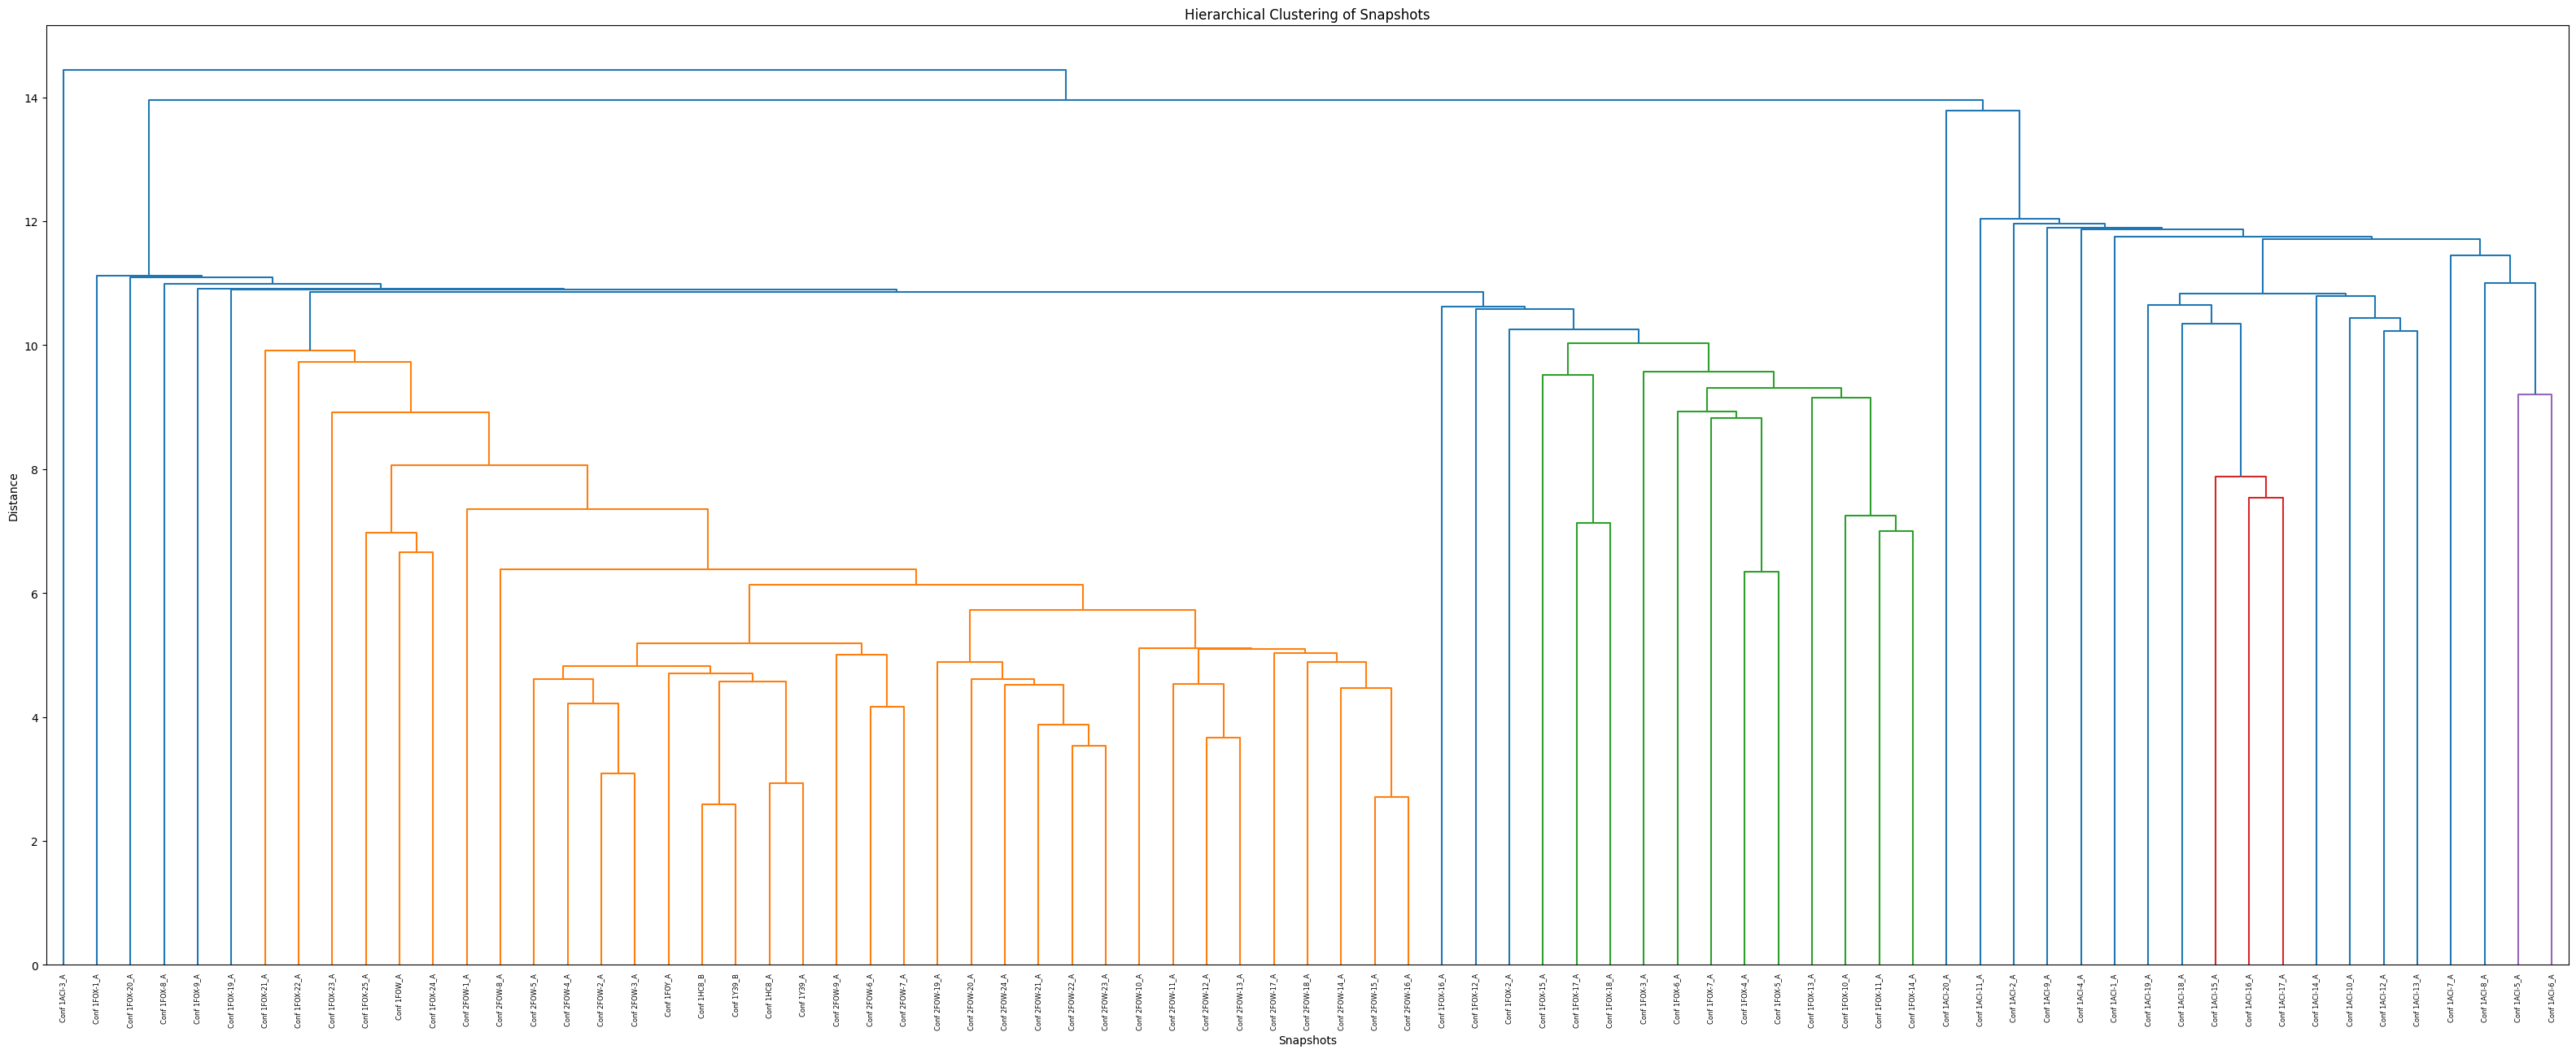

In [40]:
linkage_matrix = linkage(newpwdf, method='single')

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(15)
# Create a dendrogram for visualization
dendrogram(linkage_matrix, labels=[f'Conf {newpwdf.index[i]}' for i in range(len(newpwdf))], orientation='top')

# Customize the plot as needed

plt.title('Hierarchical Clustering of Snapshots')
plt.xlabel('Snapshots')
plt.ylabel('Distance')

plt.show()